# Exercises - Prepare

The end result of this exercise should be a file named prepare.py.

Using your store items data:

1. Convert date column to datetime format.

In [66]:
import os
import pandas as pd
import wrangle
import numpy as np
from datetime import timedelta, datetime
from env import username, host, password
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
store_df = wrangle.acquire_store()
store_df.head()

,sale_date,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode
0,2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
1,2013-01-02,11,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
2,2013-01-03,14,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
3,2013-01-04,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
4,2013-01-05,10,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253


In [10]:
store_df['sale_date'] = pd.to_datetime(store_df['sale_date'], infer_datetime_format=True)
store_df.dtypes

sale_date        datetime64[ns]
sale_amount               int64
item_brand               object
item_name                object
item_price              float64
store_address            object
store_zipcode             int64
dtype: object

2. Plot the distribution of sale_amount and item_price.

<AxesSubplot:xlabel='sale_amount'>

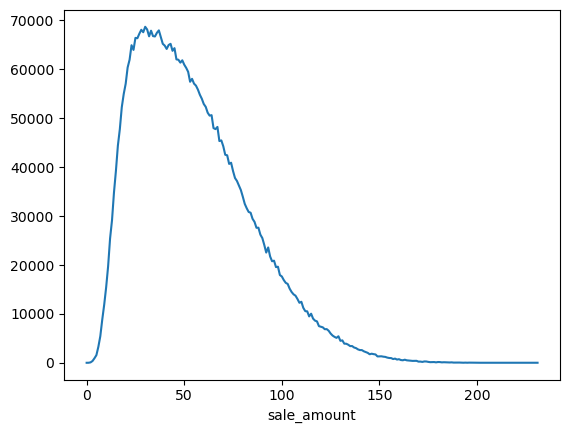

In [11]:
store_df.groupby('sale_amount')['item_price'].sum().plot()

3. Set the index to be the datetime variable.

In [12]:
store_df['month'] = store_df['sale_date'].dt.month_name()
# df['month'] = df.index.month_name()
store_df['day_of_week'] = store_df['sale_date'].dt.day_name()
store_df = store_df.set_index('sale_date')
store_df.head()

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,month,day_of_week
sale_date,,,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,January,Tuesday
2013-01-02,11,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,January,Wednesday
2013-01-03,14,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,January,Thursday
2013-01-04,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,January,Friday
2013-01-05,10,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,January,Saturday


4. Add a 'month' and 'day of week' column to your dataframe.

In [13]:
store_df.head()

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,month,day_of_week
sale_date,,,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,January,Tuesday
2013-01-02,11,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,January,Wednesday
2013-01-03,14,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,January,Thursday
2013-01-04,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,January,Friday
2013-01-05,10,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,January,Saturday


5. Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [14]:
store_df['sales_total'] = store_df['sale_amount'] * store_df['item_price']
store_df.head()

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,January,Tuesday,10.92
2013-01-02,11,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,January,Wednesday,9.24
2013-01-03,14,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,January,Thursday,11.76
2013-01-04,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,January,Friday,10.92
2013-01-05,10,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,January,Saturday,8.40


6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [19]:
def prepare_store(df):
    
    df['sale_date'] = pd.to_datetime(df['sale_date'], infer_datetime_format=True)
    df['month'] = df['sale_date'].dt.month_name()
    df['day_of_week'] = df['sale_date'].dt.day_name()
    df = df.set_index('sale_date')
    df['sales_total'] = df['sale_amount'] * df['item_price']
    return df

In [20]:
store_df = prepare_store(store_df)
store_df.head()

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,January,Tuesday,10.92
2013-01-02,11,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,January,Wednesday,9.24
2013-01-03,14,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,January,Thursday,11.76
2013-01-04,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,January,Friday,10.92
2013-01-05,10,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,January,Saturday,8.40


Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:



In [21]:
import acquire

In [50]:
power_df = acquire.acquire_open_power()
power_df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


1. Convert date column to datetime format.

In [40]:
power_df['Date'] = pd.to_datetime(power_df['Date'], infer_datetime_format=True)
power_df.dtypes

Date           datetime64[ns]
Consumption           float64
Wind                  float64
Solar                 float64
Wind+Solar            float64
dtype: object

2. Plot the distribution of each of your variables.

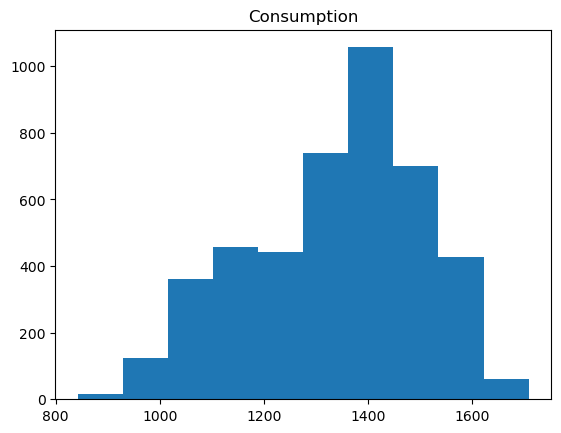

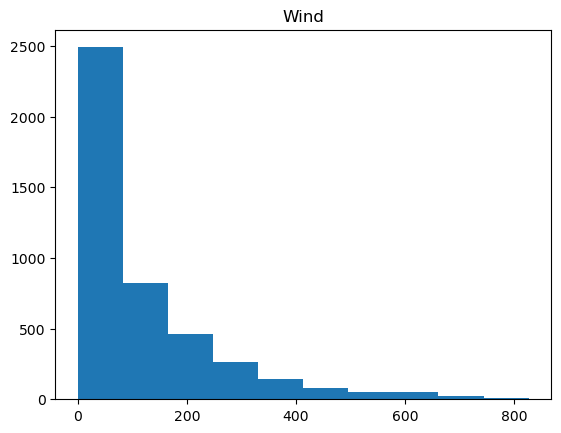

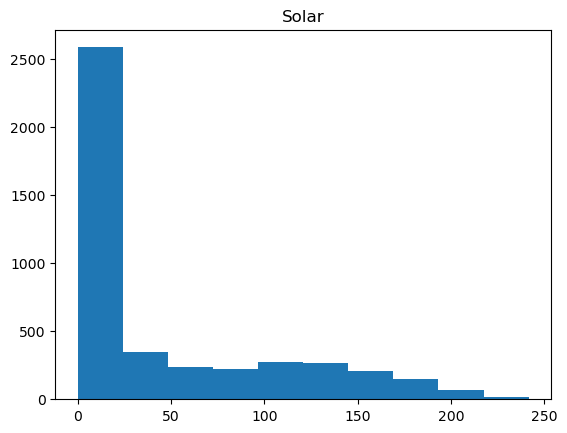

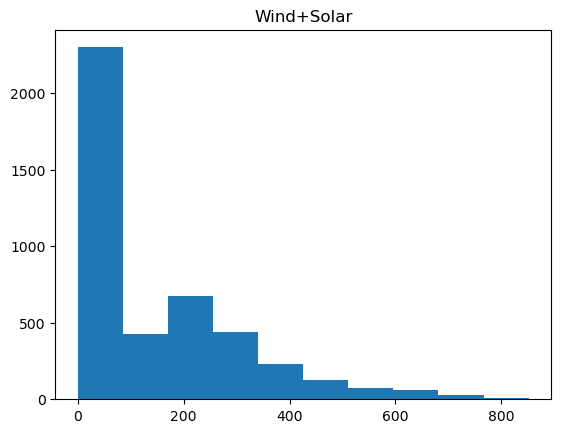

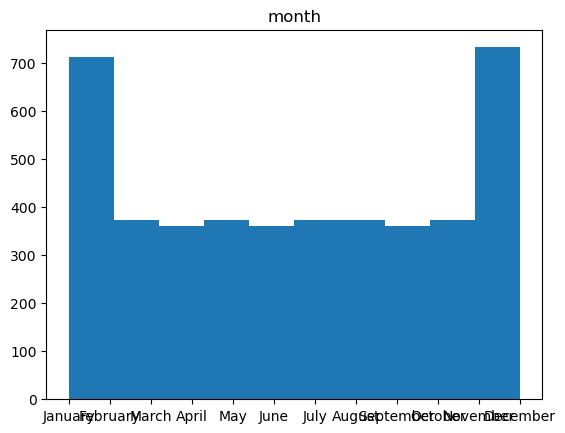

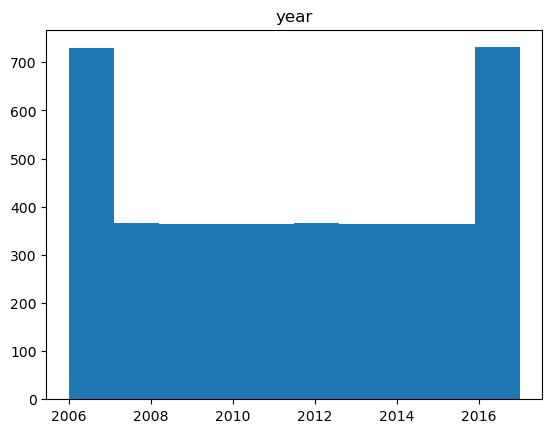

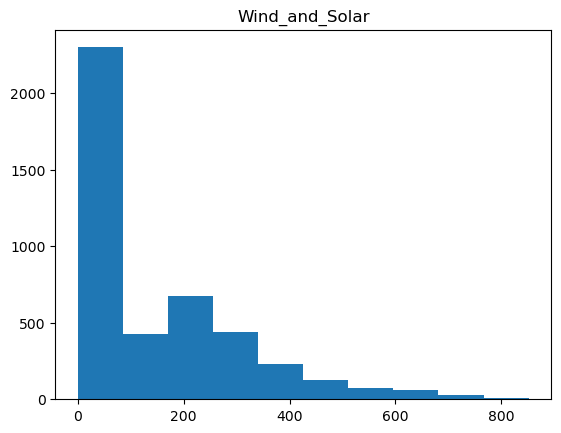

In [69]:
for col in power_df.columns:
    plt.hist(power_df[col])
    plt.title(col)
    plt.show()

<AxesSubplot:xlabel='Date'>

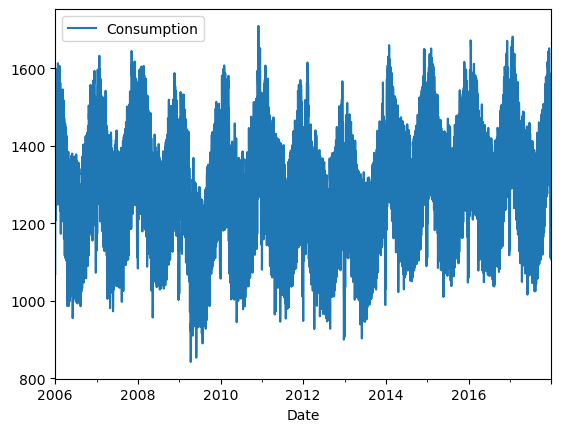

In [57]:
by_date = power_df.groupby(['Date']).Consumption.sum().reset_index()
by_date.plot(x='Date', y='Consumption')

<AxesSubplot:xlabel='Date'>

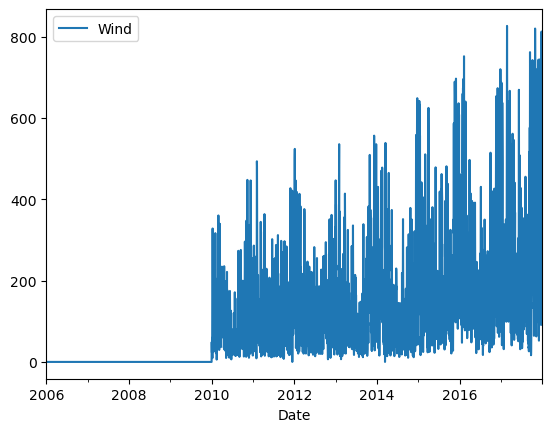

In [58]:
by_date2 = power_df.groupby(['Date']).Wind.sum().reset_index()
by_date2.plot(x='Date', y='Wind')

<AxesSubplot:xlabel='Date'>

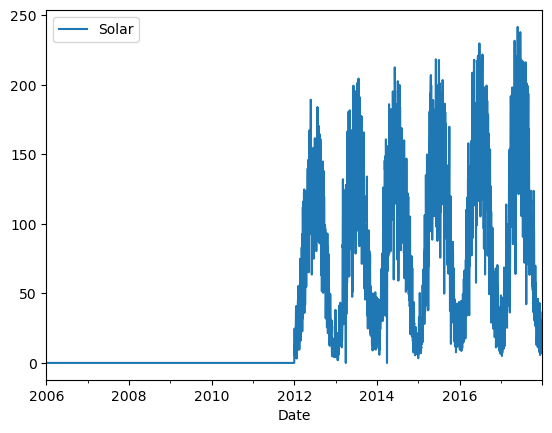

In [60]:
by_date3 = power_df.groupby(['Date']).Solar.sum().reset_index()
by_date3.plot(x='Date', y='Solar')

<AxesSubplot:xlabel='Date'>

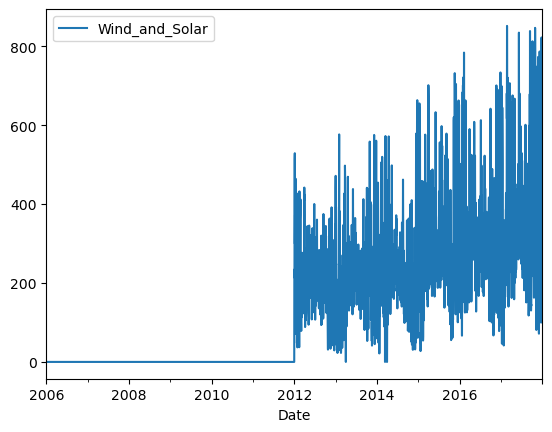

In [62]:
power_df['Wind_and_Solar'] = power_df['Wind+Solar']
by_date4 = power_df.groupby(['Date']).Wind_and_Solar.sum().reset_index()
by_date4.plot(x='Date', y='Wind_and_Solar')

3. Set the index to be the datetime variable.

In [42]:
power_df['month'] = power_df['Date'].dt.month_name()
power_df['year'] = pd.DatetimeIndex(power_df['Date']).year
power_df = power_df.set_index('Date')
power_df.head()
# power_df['year'] = power_df.index.year

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,January,2006
2006-01-02,1380.521,NaN,NaN,NaN,January,2006
2006-01-03,1442.533,NaN,NaN,NaN,January,2006
2006-01-04,1457.217,NaN,NaN,NaN,January,2006
2006-01-05,1477.131,NaN,NaN,NaN,January,2006


4. Add a month and a year column to your dataframe.

In [43]:
power_df.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,January,2006
2006-01-02,1380.521,NaN,NaN,NaN,January,2006
2006-01-03,1442.533,NaN,NaN,NaN,January,2006
2006-01-04,1457.217,NaN,NaN,NaN,January,2006
2006-01-05,1477.131,NaN,NaN,NaN,January,2006


5. Fill any missing values.

In [46]:
power_df = power_df.fillna(0)
power_df.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,January,2006
2006-01-02,1380.521,0.0,0.0,0.0,January,2006
2006-01-03,1442.533,0.0,0.0,0.0,January,2006
2006-01-04,1457.217,0.0,0.0,0.0,January,2006
2006-01-05,1477.131,0.0,0.0,0.0,January,2006


6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [51]:
def prepare_power(df):
    
    df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
    df['month'] = df['Date'].dt.month_name()
    df['year'] = pd.DatetimeIndex(df['Date']).year
    df = df.set_index('Date')
    df = df.fillna(0)
    return df

power_df = prepare_power(power_df)
power_df

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.18400,0.000,0.000,0.000,January,2006
2006-01-02,1380.52100,0.000,0.000,0.000,January,2006
2006-01-03,1442.53300,0.000,0.000,0.000,January,2006
2006-01-04,1457.21700,0.000,0.000,0.000,January,2006
2006-01-05,1477.13100,0.000,0.000,0.000,January,2006
...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,December,2017
2017-12-28,1299.86398,506.424,14.162,520.586,December,2017
2017-12-29,1295.08753,584.277,29.854,614.131,December,2017
